**Name:** <span style="color:red">Sergi Ocana and Adria Navarro</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Solving the master equation


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The aim of this practical is to solve the master equation of a birth-death processes in different situations. We will begin with the case of ***constitutive expression***. To that end, we will first write a computer code that calculates, following the steps described in class, the stationary probability density $P(n)$ of a birth-death process with constitutive expression ($C(n)=\alpha$, $D(n)=\delta n$), which we will use as a control in what follows, and plot the resulting distribution $P(n)$. Use the following parameter values: $\alpha=10$, $\delta=1.$

The solution of the master equation for this constitutive expression case can be obtained analytically, and shown to correspond to the Poisson distribution:
$$
p(n)=\frac{\lambda^n}{n!}\exp(-\lambda),
$$
where $\lambda=\alpha/\delta$ is the deterministic solution. Compare the numerical solution that you have obtained with the analytical expression of the Poisson distribution, and with the deterministic equilibrium of the system

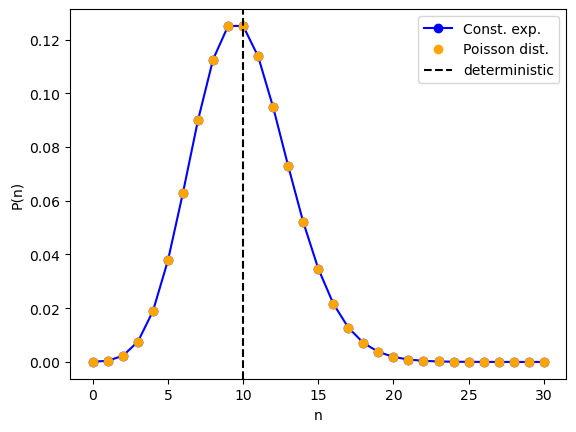

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

alpha = 10  # birth rate
delta = 1   # per capita death rate
lambda_ = alpha / delta  #equilibrium

#Number of population
n_max = 30

# Numerical solution for P(n) from master equation.
P_n = np.zeros(n_max + 1)
P_n[0] = 1.0  

# Recurrence relation based on master equation.
for n in range(1, n_max + 1):
    P_n[n] = (alpha / (delta * n)) * P_n[n - 1]

# Normalize P(n)
P_n /= np.sum(P_n)

# Poisson distribution 
n_values = np.arange(0, n_max + 1)
P_poisson = (lambda_ ** n_values) * np.exp(-lambda_) / factorial(n_values)


plt.plot(n_values, P_n, label="Const. exp.", marker="o", color="blue")
plt.plot(n_values, P_poisson, label="Poisson dist.", linestyle="", marker="o", color="orange")
plt.axvline(lambda_, linestyle="--", color="black", label="deterministic")

plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.show()


---

<span style="color:red">The numerical solution 𝑃(n) (blue line) is nearly identical to Poisson distribution (orange dots), showing that the master equation correctly models the birth-death process  with a constant birth rate.</span>

---

Next, write another computer code that calculates the stationary probability density $P(n)$ of a birth-death process with negative feedback (defined by $C(n)=\frac{\alpha_n}{1+n/k}$), with $\alpha_n=55$ and $k=2$.

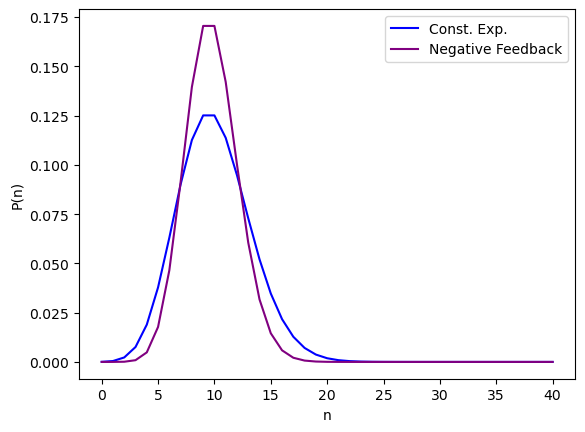

In [ ]:
alpha_const = 10  # Constant birth rate for the constitutive expression case
delta = 1         # Per capita death rate

# Parameters for negative feedback process
alpha_n = 55      # Maximum birth rate for negative feedback case
k = 2            


n_max = 40

# Function for the birth rate with negative feedback
def C_negative_feedback(n):
    return alpha_n / (1 + n / k)


P_const = np.zeros(n_max + 1)
P_const[0] = 1.0  

for n in range(1, n_max + 1):
    P_const[n] = (alpha_const / (delta * n)) * P_const[n - 1]

# Normalize P_const
P_const /= np.sum(P_const)

# Calculate P(n) for the negative feedback case
P_feedback = np.zeros(n_max + 1)
P_feedback[0] = 1.0  

for n in range(1, n_max + 1):
    P_feedback[n] = (C_negative_feedback(n - 1) / (delta * n)) * P_feedback[n - 1]


P_feedback /= np.sum(P_feedback)

n_values = np.arange(0, n_max + 1)
plt.plot(n_values, P_const, label="Const. Exp.", color="blue")
plt.plot(n_values, P_feedback, label="Negative Feedback", color="purple")

plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.show()

---

Compare **<span style="color:red">The constitutive expression case has more variation. The negative feedback case has lower variability, keeping the population size steadier and closer to the average. Negative feedback helps stabilize the population, reducing randomness.


</span>** The results of the constitutive expression and the negative feedback cases. Which one is more variable? Relate this result with the properties of the negative feedback discussed in class. 


---

Finally, calculate the stationary probability density $P(n)$ of a birth-death process with cooperative positive feedback with leakiness (defined by $C(n)=\alpha_0+\frac{\alpha_p n^p}{k^p+n^p}$), with $\alpha_0 = 10$, $\alpha_p=75$, $p=4$, and $k=40$.

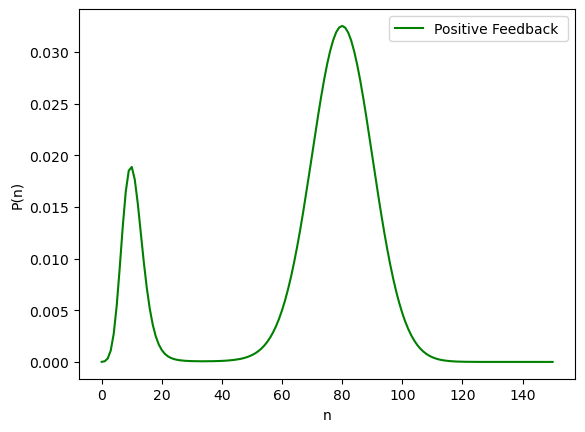

In [9]:
alpha_0 = 10    # Basal  birth rate
alpha_p = 75    # Maximum additional birth rate due to positive feedback
p = 4           # Cooperativity factor
k = 40          # Feedback threshold
delta = 1       # Per capita death rate


n_max = 150  # Chose a larger n_max to capture the effects of cooperative feedback

# Function for the birth rate with cooperative positive feedback and leakiness
def C_positive_feedback(n):
    return alpha_0 + (alpha_p * n**p) / (k**p + n**p)

P_n = np.zeros(n_max + 1)
P_n[0] = 1.0  

# Calculate P(n) for n = ... n_max
for n in range(1, n_max + 1):
    P_n[n] = (C_positive_feedback(n - 1) / (delta * n)) * P_n[n - 1]

# Normalize p(n)
P_n /= np.sum(P_n)

n_values = np.arange(0, n_max + 1)
plt.plot(n_values, P_n, label="Positive Feedback ", color="green")

plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.show()

---

<span style="color:red">In contrast to negative feedback, here we see how it increases variability and makes the population size more unpredictable. This is because positive feedback amplifies growth as the population size increases, as a result having more posibilities of the populations size  .</span> In particular, relate this result with the properties of the positive feedback discussed in class. 

---